<a href="https://colab.research.google.com/github/abyasingh/GGH_Ideathon/blob/main/climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk
%matplotlib inline

from sklearn import linear_model
from sklearn import metrics

import xgboost

In [ ]:
global_temps = pd.read_csv('/content/GlobalTemperatures.csv')

global_temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
global_temps=global_temps.drop(global_temps.columns[3:], axis=1)

global_temps=global_temps.dropna()

In [ ]:
date=global_temps['dt'].apply(lambda x: x[:4])
years = np.unique(date)
mean_temps_global=[]
mean_temps_uncertainty=[]

for y in years:

    mean_temps_global.append(global_temps[y==date]['LandAverageTemperature'].mean())
    mean_temps_uncertainty.append(global_temps[y==date]['LandAverageTemperatureUncertainty'].mean())


def heat(x):

    if type(x) is str:
        return x
    elif x<=7:
        return 3
    elif x>7 and x<=8:
        return 2
    else:
        return 1


years=pd.to_numeric(years)

d1={'Dates': pd.Series(years),'Temperatures':pd.Series(mean_temps_global),'Uncertainty':pd.Series(mean_temps_uncertainty)}

df_global_mean=pd.DataFrame(d1)

e=df_global_mean.applymap(heat)

d2={'Dates': pd.Series(years),'Temperatures':pd.Series(mean_temps_global),'Uncertainty':pd.Series(mean_temps_uncertainty),
    'Heat':e['Temperatures']}

df_global_mean=pd.DataFrame(d2)

In [ ]:
global_temps2 = pd.read_csv("GlobalTemperatures.csv", sep=',')

# Starting in 1800 when data is more significant (less NaN)

list_of_years_1800=years[50:]

# Compute Average, Max, Min Temperature by Year since 1800

date=global_temps2['dt'].apply(lambda x: x[:4])
list_of_years_1800=np.unique(date)
list_of_years_1800=list_of_years_1800[50:]

mean_temps_1800=[]
min_temps_1800=[]
max_temps_1800=[]

for y in list_of_years_1800:

    mean_temps_1800.append(global_temps2[y==date]['LandAverageTemperature'].mean())
    max_temps_1800.append(global_temps2[y==date]['LandMaxTemperature'].mean())
    min_temps_1800.append(global_temps2[y==date]['LandMinTemperature'].mean())

#Building of a new, simpler dataframe

list_of_years_1800=pd.to_numeric(list_of_years_1800)

d1={'Average Temperature':pd.Series(mean_temps_1800), 'Dates': pd.Series(list_of_years_1800),
   'Min Temperature':pd.Series(min_temps_1800),'Max Temperature':pd.Series(max_temps_1800)}

global_temps_1800=pd.DataFrame(d1)

global_temps_1800=global_temps_1800[['Dates','Average Temperature','Min Temperature','Max Temperature']]
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Circle, HoverTool, CustomJS
from bokeh.io import output_notebook

output_notebook()

x = global_temps_1800['Dates']
y = global_temps_1800['Average Temperature']
z = global_temps_1800['Min Temperature']
t = global_temps_1800['Max Temperature']

p = figure(plot_width=600, plot_height=600)


p.line(x, y, legend="Average Temperature", line_color="green", line_width=3)

p.line(x,z, legend="Min Temperature", line_color="blue", line_width=3)

p.line(x, t, legend="Max Temperature", line_color="red", line_width=3)

# change just some things about the x-grid
p.xgrid.band_fill_alpha = 0.05
p.xgrid.band_fill_color = "navy"

p.legend.location = "top_left"
p.legend.glyph_width = 2
p.legend.label_width=2


show(p)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


#Define the input and output
temp=global_temps_1800['Average Temperature']
time=global_temps_1800['Dates']


# The data sets
dates_X = time.iloc[0:,]

# The targets
temperature_y = temp.iloc[0:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the data sets
reg.fit(dates_X.to_frame(),temperature_y.to_frame())

# The estimation
output_reg=reg.predict(dates_X.to_frame())
output_simple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_simple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)


# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(dates_X.to_frame()) - temperature_y.to_frame()) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(dates_X.to_frame(), temperature_y.to_frame()))


Coefficients: 
 [[0.00721859]]
Intercept: 
 [-5.35578585]
Mean squared error: 0.12
Variance score: 0.64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


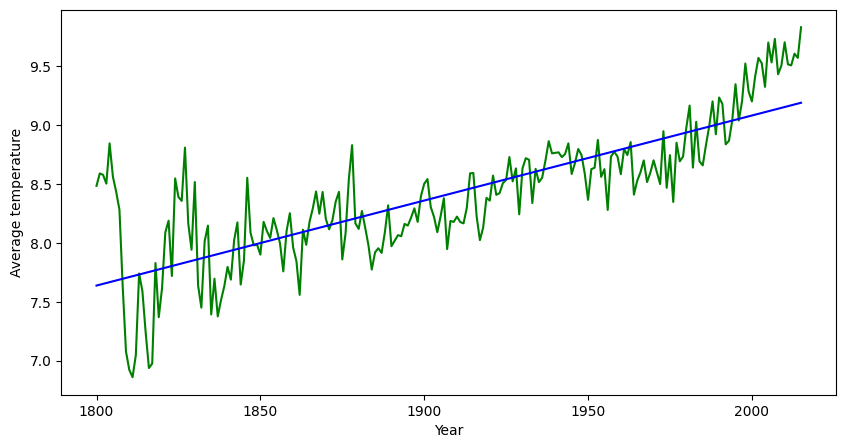

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X, temperature_y, label='Annual Mean temperature', color='g')
plt.plot(dates_X,output_simple,label='Forecast Temperature by Regression',color='b')

In [ ]:
time=pd.DataFrame()
time["Dates"]=global_temps_1800['Dates']
time["Dates^2"]=global_temps_1800['Dates']*global_temps_1800['Dates']
time["Dates^3"]=global_temps_1800['Dates']*global_temps_1800['Dates']*global_temps_1800['Dates']
temp=global_temps_1800['Average Temperature']


# The data sets
dates_X = time.iloc[0:,0]

# The targets
temperature_y = temp.iloc[0:,]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(time.iloc[0:,],temperature_y.to_frame())

# The prediction
output_reg=reg.predict(time.iloc[0:,])
output_multiple=np.copy(output_reg)
output=pd.DataFrame(index=pd.DataFrame(output_simple).index.values)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((output_reg - temperature_y.to_frame()) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(time.iloc[0:,], temperature_y.to_frame()))

# Euclidian Distance
output['Predicted Temperature']=pd.DataFrame(output_multiple)
output["Average Temperature"]=temp

Coefficients: 
 [[ 1.54583760e+00 -8.43972200e-04  1.53912499e-07]]
Intercept: 
 [-937.81103859]
Mean squared error: 0.10
Variance score: 0.69


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


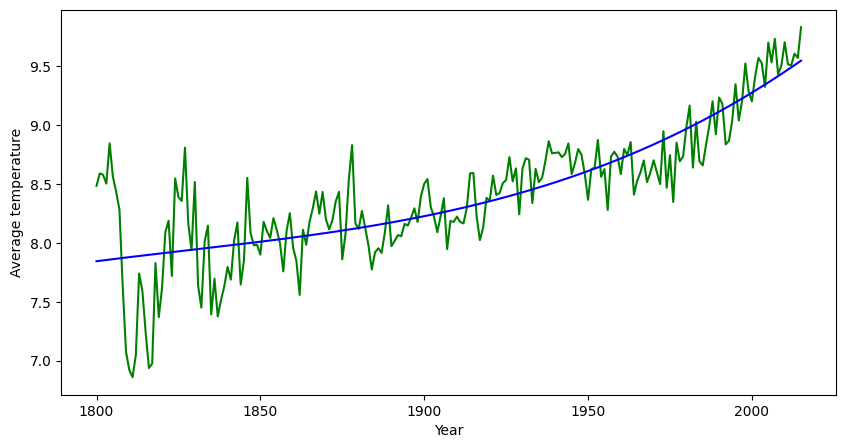

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
axes.set_ylabel('Average temperature')
axes.set_xlabel('Year')
plt.plot(dates_X, temperature_y, label='Annual Mean temperature', color='g')
plt.plot(dates_X,output_multiple,label='Forecast Reg',color='b')

<ipython-input-15-cd897f422e2c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=global_temperatures.corr()


<Axes: >

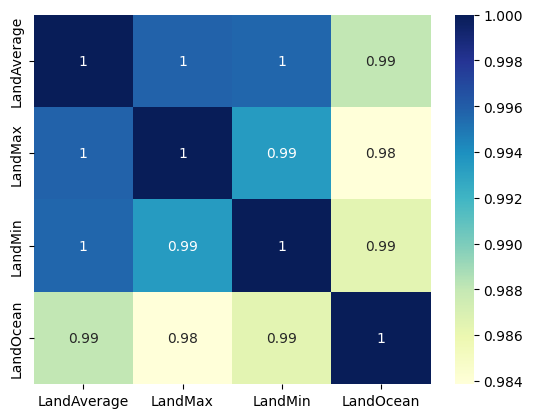

In [ ]:
global_temperatures=pd.read_csv("GlobalTemperatures.csv", sep=',')
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])
global_temperatures=global_temperatures.drop(['LandAverageTemperatureUncertainty',"LandMaxTemperatureUncertainty","LandMinTemperatureUncertainty","LandAndOceanAverageTemperatureUncertainty"],axis=1)
global_temperatures=global_temperatures.dropna()
corr=global_temperatures.corr()

# Heatmap for the previous correlation matrix
sns.heatmap(corr,xticklabels=['LandAverage','LandMax','LandMin','LandOcean'], yticklabels=['LandAverage','LandMax','LandMin','LandOcean'], annot=True,cmap="YlGnBu")


In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
train_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df_2=pd.DataFrame.copy(train_df_copy_2)
train_df_2.drop(train_df_2.index[:1], inplace=True)
train_df_copy_2.drop(train_df_2.index[-1], inplace=True)

# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (train_df_2.index):
    for column in train_df_2.columns[1:-1]:
        train_df_2.loc[j,column]=train_df_copy_2.loc[j-1,column]
forest2 = XGBRegressor()
train_df_2=train_df_2.drop(['dt'],axis=1)
forest2 = forest2.fit(train_df_2.drop(["LandAverageTemperature"],axis=1),train_df_2["LandAverageTemperature"])

In [ ]:
test_df_copy_2=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df_2=pd.DataFrame.copy(test_df_copy_2)
test_df_2.drop(test_df_2.index[:1], inplace=True)
test_df_copy_2.drop(test_df_2.index[-1], inplace=True)
# To predict each average land temperature we use the previous year's temperatures (landandocean, min , max)
for j in (test_df_2.index):
    for column in test_df_2.columns[1:-1]:
        test_df_2.loc[j,column]=test_df_copy_2.loc[j-1,column]
test_df_2=test_df_2.drop(['dt'],axis=1)
output = forest2.predict(test_df_2.drop(["LandAverageTemperature"],axis=1))

In [ ]:
test_df_2['Predicted_temp']=output
# Distance computing
MED=abs(test_df_2['LandAverageTemperature']-test_df_2['Predicted_temp']).mean()
MED

0.24781643837399941

In [ ]:
train_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)<1980])
train_df=pd.DataFrame.copy(train_df_copy)
train_df.drop(train_df.index[:1], inplace=True)
train_df_copy.drop(train_df.index[-1], inplace=True)
for j in (train_df.index):
    for column in train_df.columns[1:-1]:
        train_df.loc[j,column]=train_df_copy.loc[j-1,column]

train_df=train_df.drop(['dt'],axis=1)

#Test
test_df_copy=pd.DataFrame.copy(global_temperatures[global_temperatures['dt'].map(lambda x: x.year)>=1980])
test_df=pd.DataFrame.copy(test_df_copy)
test_df.drop(test_df.index[:1], inplace=True)
test_df_copy.drop(test_df.index[-1], inplace=True)
for j in (test_df.index):
    for column in test_df.columns[1:-1]:
        test_df.loc[j,column]=test_df_copy.loc[j-1,column]

test_df=test_df.drop(['dt'],axis=1)


X_train = train_df.drop("LandAverageTemperature", axis = 1)
y_train = train_df['LandAverageTemperature']

X_test = test_df.drop("LandAverageTemperature", axis = 1)
y_test = test_df['LandAverageTemperature']

In [ ]:
def MED_XGB(n,maxi,learn,
       X_train, y_train, X_test,y_test,
       MED_limit):

    xgb_model = xgboost.XGBRegressor(n_estimators = n , learning_rate = learn, max_depth = maxi )
    model_fit = xgb_model.fit(X_train , y_train )
    y_predict = model_fit.predict(X_test)
    MED=abs(y_test-y_predict).mean()

    if MED<MED_limit:
        return MED , n, learn, maxi
    else:
        return 0

In [ ]:
max_depth = [2+i for i in range(5)]
learning_rate = [0.01*(i+1) for i in range(5)]
n_estimators = [370+i for i in range(20)]
MED_limit =  0.21
l=[]

for n in n_estimators:
    for learn in learning_rate:
        for maxi in max_depth:
            a = MED_XGB(n,maxi,learn,X_train,y_train,X_test,y_test,MED_limit)
            if a != 0:
                l.append(a)
                l.sort()

l[:5]

[(0.2024272857099564, 385, 0.04, 2),
 (0.20243702159624918, 386, 0.04, 2),
 (0.20244119143209435, 387, 0.04, 2),
 (0.2025020982516614, 384, 0.04, 2),
 (0.2025107875301777, 383, 0.04, 2)]

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance,to_graphviz, plot_tree
from sklearn.model_selection import GridSearchCV

xgb_model = xgboost.XGBRegressor()

clf = GridSearchCV(xgb_model,
                   {'max_depth': max_depth,
                    'n_estimators': n_estimators,
                   'learning_rate': learning_rate}, verbose=1)

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


(0.9925845011151591,
 {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 370})

In [ ]:
maxi = 2
learn = 0.04
n = 385

xgb_model = xgboost.XGBRegressor(max_depth = maxi,
                             learning_rate = learn,
                             n_estimators = n)

model_fit = xgb_model.fit(X_train,y_train)